# Instalação de Bibliotecas

Podemos executar a instalação de bibliotecas faltantes por meio de chamadas ao gerenciador de pacotes.

In [30]:
!pip install numpy 
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install sklearn

In [31]:
# inicialmente montamos o drive
from google.colab import drive
drive._mount('/content/drive')

import pandas as pd

arq_dados_imoveis = '/content/drive/MyDrive/FIAP/DAN-BD/dados_imoveis_cwb.tsv'
df_dados_imoveis = pd.read_csv(arq_dados_imoveis, sep='\t')
df_dados_imoveis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,preco,area,quartos,banheiros,vagas,suites,bairro
0,286000,63.00,2.0,2.0,1.0,1.0,portao
1,328000,75.00,3.0,2.0,1.0,1.0,portao
2,370000,62.77,2.0,2.0,2.0,1.0,portao
3,295000,62.88,2.0,2.0,1.0,1.0,portao
4,260000,75.00,3.0,2.0,1.0,1.0,portao
...,...,...,...,...,...,...,...
4465,470000,114.00,3.0,3.0,1.0,1.0,cristo-rei
4466,190000,37.00,1.0,1.0,NaN,NaN,cristo-rei
4467,485000,125.00,3.0,3.0,2.0,1.0,cristo-rei
4468,380000,68.00,3.0,2.0,2.0,1.0,cristo-rei


In [32]:
df_dados_imoveis.tail(25)

,preco,area,quartos,banheiros,vagas,suites,bairro
4445,330000,77.82,2.0,2.0,1.0,1.0,cristo-rei
4446,383000,49.00,1.0,1.0,1.0,NaN,cristo-rei
4447,706000,121.00,NaN,NaN,2.0,NaN,cristo-rei
4448,690000,88.00,3.0,2.0,2.0,1.0,cristo-rei
4449,240000,67.00,3.0,2.0,NaN,1.0,cristo-rei
4450,818244,143.00,4.0,1.0,2.0,1.0,cristo-rei
4451,800000,131.00,3.0,3.0,2.0,1.0,cristo-rei
4452,967113,182.00,4.0,3.0,3.0,3.0,cristo-rei
4453,358248,69.00,2.0,2.0,1.0,1.0,cristo-rei
4454,511420,70.00,3.0,2.0,1.0,1.0,cristo-rei


# Obtenção de uma amostra de referência

In [33]:
# criacao dos estratos
df_dados_imoveis['categoria'] = pd.qcut(df_dados_imoveis['preco'], 4, labels = ['D', 'C', 'B', 'A'])

df_dados_imoveis


,preco,area,quartos,banheiros,vagas,suites,bairro,categoria
0,286000,63.00,2.0,2.0,1.0,1.0,portao,D
1,328000,75.00,3.0,2.0,1.0,1.0,portao,D
2,370000,62.77,2.0,2.0,2.0,1.0,portao,C
3,295000,62.88,2.0,2.0,1.0,1.0,portao,D
4,260000,75.00,3.0,2.0,1.0,1.0,portao,D
...,...,...,...,...,...,...,...,...
4465,470000,114.00,3.0,3.0,1.0,1.0,cristo-rei,C
4466,190000,37.00,1.0,1.0,NaN,NaN,cristo-rei,D
4467,485000,125.00,3.0,3.0,2.0,1.0,cristo-rei,C
4468,380000,68.00,3.0,2.0,2.0,1.0,cristo-rei,C


In [34]:
dados_piloto = df_dados_imoveis.agg(media_preco = pd.NamedAgg('preco', 'mean'),
                                    dp_preco = pd.NamedAgg('preco', 'std'),
                                    N = pd.NamedAgg('preco', 'count'))
dados_piloto


,preco
media_preco,757536.980537
dp_preco,743353.003283
N,4470.000000


In [35]:
dados_piloto.loc['N']

preco    4470.0
Name: N, dtype: float64

In [36]:
# dados piloto por estrato
dados_piloto_categoria = df_dados_imoveis.groupby('categoria') \
                       .agg(media_preco = pd.NamedAgg('preco', 'mean'),
                            dp_preco = pd.NamedAgg('preco', 'std'),
                            N = pd.NamedAgg('preco', 'count')) \
                       .reset_index()
                       
dados_piloto_categoria['percent'] = dados_piloto_categoria['N'] / sum(dados_piloto_categoria['N'])
dados_piloto_categoria


,categoria,media_preco,dp_preco,N,percent
0,D,2.580113e+05,54508.930364,1120,0.250559
1,C,4.233544e+05,50852.971085,1116,0.249664
2,B,6.732811e+05,99204.379719,1117,0.249888
3,A,1.676544e+06,991379.107200,1117,0.249888


In [37]:
dados_piloto.loc['N']

preco    4470.0
Name: N, dtype: float64

In [38]:
# formula continua
def formula_amostra_continua(N, S, Z, ME):
  n = (Z**2 * S**2 * N) / ((ME**2 * (N-1)) + (Z**2 * S**2))
  return int(n)


# formula discreta
def formula_amostra_discreta(N, Z, ME):
  n = (Z**2 * 0.25 * N) / ((ME**2 * (N-1)) + (Z**2 * 0.25))
  return int(n)



# parametros
N = dados_piloto.loc['N']  # obtido do piloto
Z = 1.96               # nível de confiança de 96%

S = dados_piloto.loc['dp_preco']             # desvio-padrão piloto

ME = 50000            # margem de erro 

# tamanho amostra
n = formula_amostra_continua(N, S, Z, ME)
n


713

Qual distribuição dos filmes?


# Obtenção de Amostras

In [39]:
N[0]

4470.0

In [40]:
import random as rd

n = 1500
N = 4470

# sorteio das linhas
linhas_sorteadas = rd.sample(range(1, N+1), n)



# filtrar os dados
dados_amostra = df_dados_imoveis[df_dados_imoveis.index.isin(linhas_sorteadas)]
dados_amostra.shape


(1500, 8)

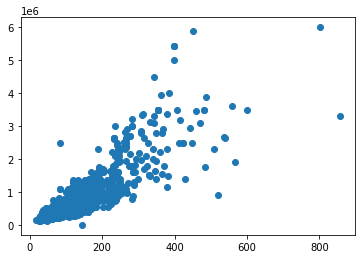

In [41]:

import matplotlib.pyplot as plt

plt.scatter(dados_amostra['area'], dados_amostra['preco'])


In [42]:
dados_amostra_simples = df_dados_imoveis.sample(n=1500)
dados_amostra_simples



,preco,area,quartos,banheiros,vagas,suites,bairro,categoria
1971,234200,34.42,1.0,1.0,NaN,NaN,centro,D
1957,606000,47.00,1.0,1.0,NaN,1.0,centro,B
2299,1430000,174.95,3.0,5.0,3.0,3.0,ecoville,A
751,687209,98.53,2.0,1.0,2.0,NaN,agua-verde,B
1054,328000,69.00,2.0,NaN,2.0,1.0,agua-verde,D
...,...,...,...,...,...,...,...,...
764,900000,119.77,3.0,3.0,3.0,2.0,agua-verde,A
1122,1380900,193.00,3.0,5.0,3.0,3.0,agua-verde,A
4192,435000,60.00,2.0,1.0,1.0,1.0,cristo-rei,C
4370,205000,44.00,1.0,NaN,NaN,NaN,cristo-rei,D


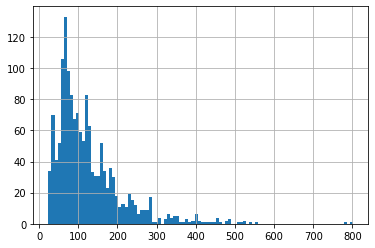

In [43]:
dados_amostra_simples['area'].hist( bins=100 )

E para obter uma amostra estratificada?

In [44]:
from sklearn.model_selection import train_test_split

n = 1500
treino_amostra, teste_amostra  = train_test_split(df_dados_imoveis, 
                                    test_size = n, 
                                    random_state=1245, 
                                    stratify=df_dados_imoveis['bairro'])
print(f"Dados de treino: {treino_amostra.shape}")
print(f"Dados de teste: {teste_amostra.shape}")


Dados de treino: (2970, 8)
Dados de teste: (1500, 8)


In [45]:
treino_amostra

,preco,area,quartos,banheiros,vagas,suites,bairro,categoria
3351,1050000,202.0,4.0,1.0,2.0,2.0,batel,A
34,325000,90.0,3.0,1.0,1.0,1.0,portao,D
162,359900,66.0,2.0,2.0,1.0,1.0,portao,C
3657,320000,100.0,2.0,2.0,1.0,1.0,cabral,D
1458,270000,75.0,3.0,2.0,1.0,NaN,agua-verde,D
...,...,...,...,...,...,...,...,...
3077,1300000,160.0,4.0,4.0,3.0,2.0,batel,A
3030,1099999,220.0,4.0,5.0,3.0,2.0,batel,A
198,326300,64.0,3.0,2.0,2.0,1.0,portao,D
1807,695000,105.0,1.0,2.0,2.0,1.0,centro,B


In [46]:
merged

,preco,area,quartos,banheiros,vagas,suites,agua-verde,batel,cabral,centro,cristo-rei,ecoville,portao
3790,1500000,240.00,3.0,3.0,3.0,2.0,0,0,1,0,0,0,0
1681,198000,24.50,1.0,NaN,1.0,NaN,0,0,0,1,0,0,0
4041,4500000,429.00,4.0,5.0,5.0,4.0,0,0,1,0,0,0,0
666,680000,126.00,3.0,4.0,2.0,1.0,0,0,0,0,0,0,1
1311,550000,114.00,3.0,1.0,2.0,1.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1388000,243.00,3.0,4.0,3.0,3.0,0,0,0,0,0,0,1
3313,845000,240.00,3.0,NaN,3.0,NaN,0,1,0,0,0,0,0
66,340600,75.18,3.0,1.0,1.0,1.0,0,0,0,0,0,0,1
3466,5423660,398.00,4.0,NaN,4.0,4.0,0,1,0,0,0,0,0


Como agrupar as instâncias?

In [47]:
X = treino_amostra.copy()
pd.get_dummies(X.bairro)

,agua-verde,batel,cabral,centro,cristo-rei,ecoville,portao
3351,0,1,0,0,0,0,0
34,0,0,0,0,0,0,1
162,0,0,0,0,0,0,1
3657,0,0,1,0,0,0,0
1458,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
3077,0,1,0,0,0,0,0
3030,0,1,0,0,0,0,0
198,0,0,0,0,0,0,1
1807,0,0,0,1,0,0,0


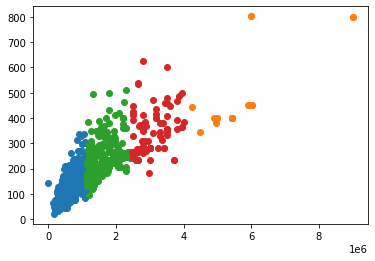

In [62]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# carrega dados 
X = treino_amostra.copy()

# conversão dos valores categoricos
dummies = pd.get_dummies(X.bairro) 

# junta com o dataframe original
merged = pd.concat([X, dummies], axis='columns')
 
# apaga colunas que não serão utilizadas
del merged['bairro']
del merged['categoria']

X = merged.dropna().to_numpy()

# modelo de clusterização
model = AgglomerativeClustering(n_clusters=4)

# Treinamento do modelo e predição dos clusters
yhat = model.fit_predict(X)

# Recupera os ids dos clusters
clusters = unique(yhat)

# Plota uma aproximação dos clusters
for cluster in clusters:
    # Recupera as linhas do cluster atual
    row_ix = where(yhat == cluster)

    # Plota as instâncias
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# Exibe o gráfico
pyplot.show()


Como prever o preço do imóvel?

In [49]:
from sklearn.model_selection import train_test_split

n = 1000
treino_amostra, teste_amostra  = train_test_split(df_dados_imoveis, 
                                    test_size = n, 
                                    random_state=1245, 
                                    stratify=df_dados_imoveis['bairro'])
print(f"Dados de treino: {treino_amostra.shape}")
print(f"Dados de teste: {teste_amostra.shape}")

Dados de treino: (3470, 8)
Dados de teste: (1000, 8)


In [57]:
from sklearn.linear_model import LinearRegression

# carrega dados 
X = treino_amostra.copy()

# conversão dos valores categoricos
dummies = pd.get_dummies(X.bairro) 
# junta com o dataframe original
merged = pd.concat([X, dummies], axis='columns')
 
# apaga colunas que não serão utilizadas
del merged['bairro']
del merged['categoria']

X = merged.dropna().iloc[:, 1:].to_numpy()
y = merged.dropna().iloc[:, 0].to_numpy()

reg = LinearRegression().fit(X, y)



In [58]:
y

array([ 510000,  349900, 1300000, ...,  935000, 1390000,  254500])

In [59]:
# carrega dados 
X_teste = teste_amostra.copy()

# conversão dos valores categoricos
dummies = pd.get_dummies(X_teste.bairro) 
# junta com o dataframe original
merged = pd.concat([X_teste, dummies], axis='columns')
 
# apaga colunas que não serão utilizadas
del merged['bairro']
del merged['categoria']

X_teste = merged.dropna().iloc[:, 1:].to_numpy()
y_teste = merged.dropna().iloc[:, 0].to_numpy()

y_pred = reg.predict(X_teste)

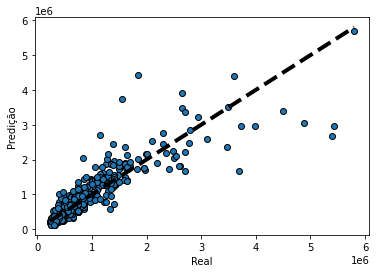

In [60]:
# Plota gráfico de comparação
fig, ax = plt.subplots()
ax.scatter(y_teste, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_teste.min(), y_teste.max()],
[y_teste.min(), y_teste.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()